In [1]:
### Logistic Regression: Water Pumps dataset (Ministry of Water, Govt. of Tanzania)

In [2]:
# https://www.kaggle.com/tatianasnwrt/pumpitup-challenge-dataset#X_test_raw.csv

In [3]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# training data

train_features = pd.read_csv('X_train_pumps.csv', index_col=0)
train_labels = pd.read_csv('y_train_pumps.csv', index_col=0)

train_features.shape, train_labels.shape

((59400, 39), (59400, 1))

In [5]:
# test data

test_features = pd.read_csv('X_test_pumps.csv', index_col=0)

test_features.shape

(14850, 39)

In [6]:
train_features.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [7]:
train_labels.head(3)

,status_group
id,
69572,functional
8776,functional
34310,functional


In [8]:
test_features.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [9]:
# function tabulates summary of data (total, NaNs and zeros)

def tabulate_summary(df):
    total = df.isnull().count()
    nans = df.isnull().sum()
    percent_nans = (nans/total) * 100
    zeros = df[df == 0].count(axis=0)
    percent_zeros = (zeros/total) * 100 
    data_type = df.dtypes
    summary_stats = pd.concat([total, nans, percent_nans.round(2), zeros,
                              percent_zeros.round(2), data_type], axis=1,
                             keys=['Total', 'NaNs', '% NaNs', 'Zeros', '% Zeros', 'Data Type'])
    return summary_stats   

In [10]:
# Train Data Summary

# NaNs: mostly in features that have nominal characteristics:
# funder, installer, subvillage, public meeting, scheme_management, scheme_name & permit 
# nearly half of scheme_name is missing, rest ~6% of total or even less
# at first glance, it appears that missing rows can be safely dropped, and scheme_name feature should entirely go  

# Zeros: very substantial numbers in several columns
# 70% of amount_tsh: will retain this as this is amount at water head 
# 35% of gps_height: this indicates pumps at sea level, retain as is 
# 3% of longitude: doesn't make sense as Tanzania is well east of Greenwich, substitute with mean of others 
# 99% of num_private: drop entire column
# 35% of population: will retain, perhaps lack of population correlates with functionality 
# 9% public_meeting & 30% permit: drop? 
# 35% construction_year: quite substantial, also drop?

train_summary = tabulate_summary(train_features)
train_summary

,Total,NaNs,% NaNs,Zeros,% Zeros,Data Type
amount_tsh,59400,0,0.00,41639,70.10,float64
date_recorded,59400,0,0.00,0,0.00,object
funder,59400,3635,6.12,0,0.00,object
gps_height,59400,0,0.00,20438,34.41,int64
installer,59400,3655,6.15,0,0.00,object
longitude,59400,0,0.00,1812,3.05,float64
latitude,59400,0,0.00,0,0.00,float64
wpt_name,59400,0,0.00,0,0.00,object
num_private,59400,0,0.00,58643,98.73,int64
basin,59400,0,0.00,0,0.00,object


In [11]:
# Test Data Summary

# NaNs: again, mostly in nominal columns
# can be safely dropped 

# Zeros: also very similar to the train dataset
# similar logic of drop or retain can be used

test_summary = tabulate_summary(test_features)
test_summary

,Total,NaNs,% NaNs,Zeros,% Zeros,Data Type
amount_tsh,14850,0,0.00,10410,70.10,float64
date_recorded,14850,0,0.00,0,0.00,object
funder,14850,869,5.85,0,0.00,object
gps_height,14850,0,0.00,5211,35.09,int64
installer,14850,877,5.91,0,0.00,object
longitude,14850,0,0.00,457,3.08,float64
latitude,14850,0,0.00,0,0.00,float64
wpt_name,14850,0,0.00,0,0.00,object
num_private,14850,0,0.00,14656,98.69,int64
basin,14850,0,0.00,0,0.00,object


In [12]:
# EDA

In [13]:
# merging train features and labels for data exploration/visualization

In [14]:
pumps = pd.merge(train_features, train_labels, how='left', on='id')

In [15]:
pumps.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [16]:
# Overview: Correlation plot

# strong positive correlations between district_code and region_code, colinear! drop one feature: region_code
# also between gps_height and construction_year: because they both have a lot of zeros
# construction year problem cannot be solved in any meaningful way - so might be better to drop this feature 

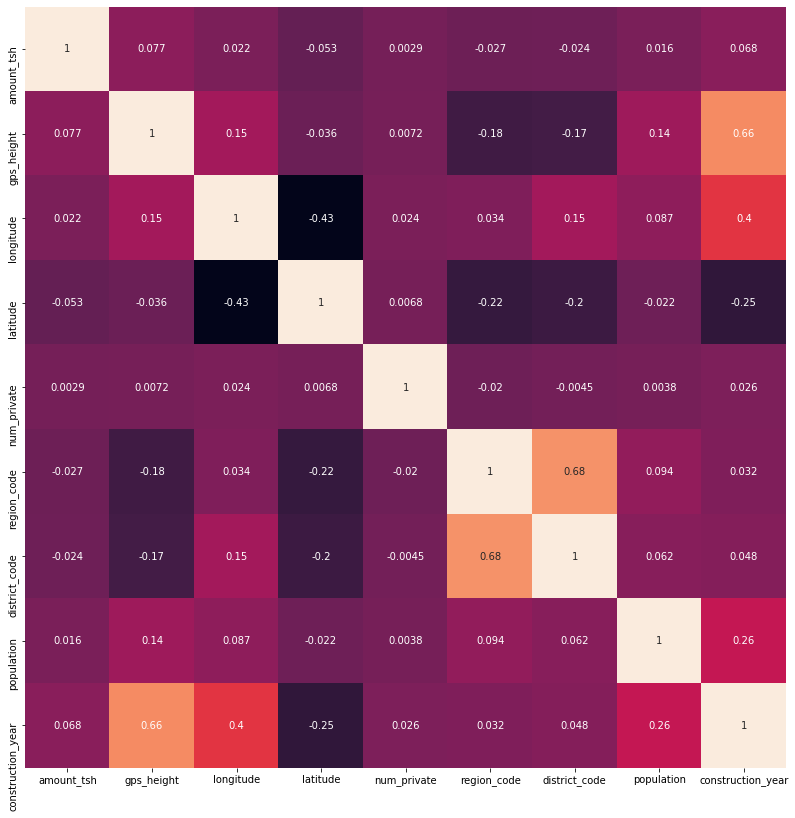

In [17]:
corr_plot = pumps.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_plot, square=True, annot=True, cbar=False)

In [18]:
# amount_tsh: 70% of sources have no water, few have lots 

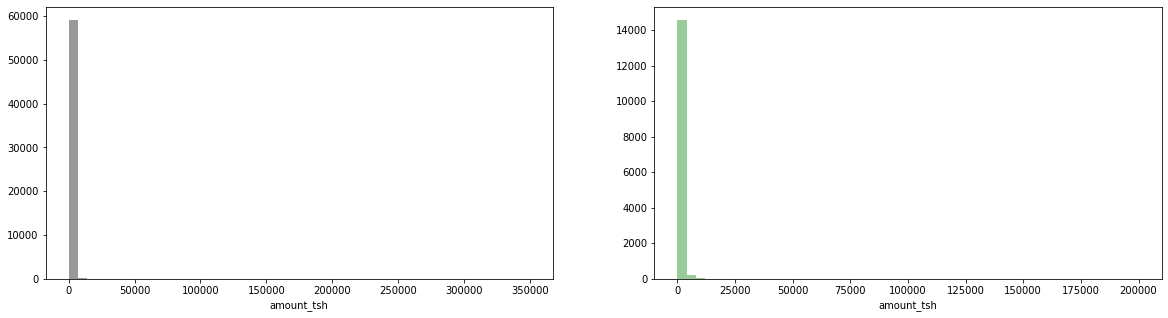

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['amount_tsh'], kde=False, color='black', ax=ax1)
ax2 = sns.distplot(test_features['amount_tsh'], kde=False, color='green', ax=ax2)

[(0, 5000), (0, 5000)]

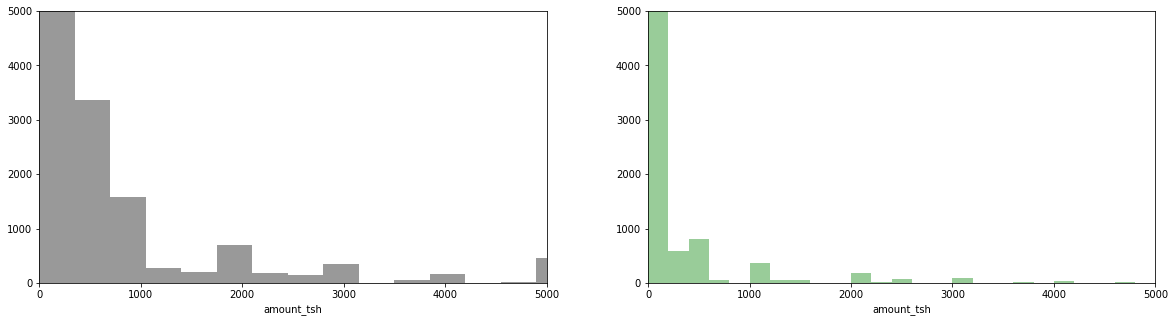

In [20]:
# zooming in for closer look 

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['amount_tsh'], bins=1000, kde=False, color='black', ax=ax1)
ax1.set(xlim=(0, 5000), ylim=(0, 5000))
ax2 = sns.distplot(test_features['amount_tsh'], bins=1000, kde=False, color='green', ax=ax2)
ax2.set(xlim=(0, 5000), ylim=(0, 5000))

In [21]:
# date_recorded

# can't see how this could contribute, dropping

In [22]:
# funder & installer: data not same in train & test data sets, so getting dummies not possible, drop both

In [23]:
# pumps.fillna({'funder':'unknown', 'installer':'anon'})

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
37057,0.0,2011-04-11,unknown,0,anon,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


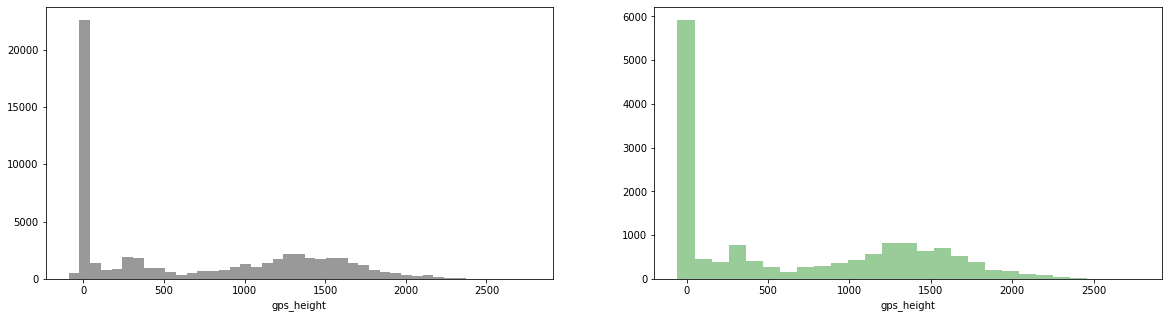

In [24]:
# gps_height: no missing data, but lot of 0 values, ie pumps at sealevel, few below sealevel (negative values)
# will retain values as is 

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['gps_height'], kde=False, color='black', ax=ax1)
ax2 = sns.distplot(test_features['gps_height'], kde=False, color='green', ax=ax2)

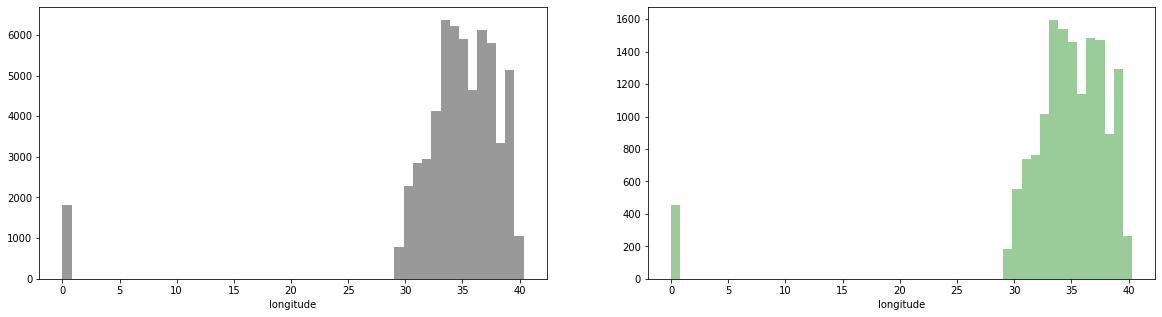

In [25]:
# longitude: some 0 values, not possible as Tanzania is not near prime meridean
# ~3% of locations have this, can safely assign the mean for the country

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['longitude'], kde=False, color='black', ax=ax1)
ax2 = sns.distplot(test_features['longitude'], kde=False, color='green', ax=ax2)

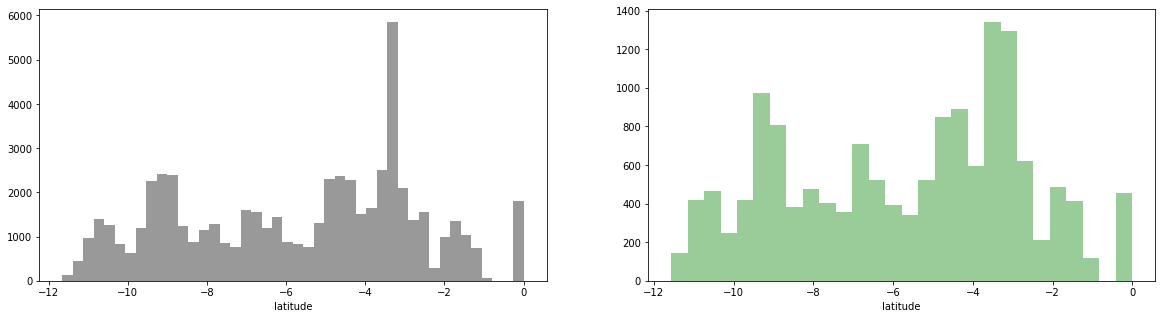

In [26]:
# latitude: looks fine, will retain as is 

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['latitude'], kde=False, color='black', ax=ax1)
ax2 = sns.distplot(test_features['latitude'], kde=False, color='green', ax=ax2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


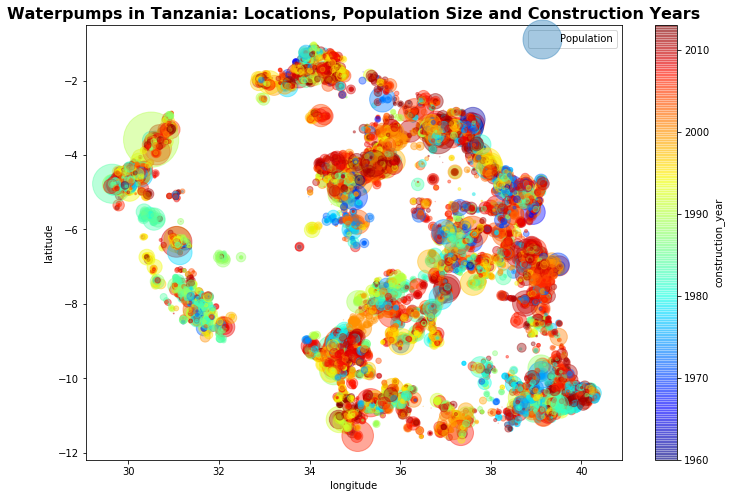

In [27]:
# Cool visulization: location of pumps, population size and construction year

train_features[train_features['longitude'] > 0][train_features['latitude'] < 0][train_features['construction_year'] > 0].plot\
(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=train_features['population'] / 10, label='Population', figsize=(12,8),
c='construction_year', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False);
plt.title('Waterpumps in Tanzania: Locations, Population Size and Construction Years', fontsize='16', fontweight='bold')
plt.legend;

In [28]:
# wpt_name: dropping as data not identical in train & test, getting dummies not possible

train_features['wpt_name'].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Mliasi                  1
Kwa Juma Cosmas             1
Kimai                       1
Kwa Jennifer Loshorwa       1
Kwa Makudali                1
Name: wpt_name, Length: 37400, dtype: int64

In [29]:
# num_private: mostly zeros, dropping as data not identical in train & test, getting dummies not possible

train_features['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
38          4
58          4
9           4
10          4
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, dtype: int64

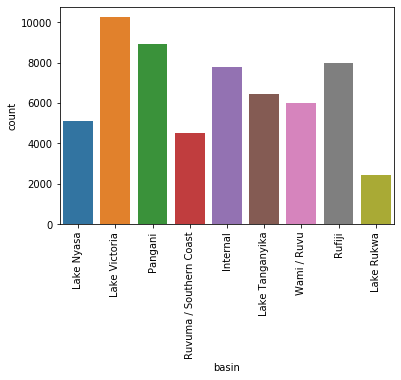

In [30]:
# basin

basin_chart = sns.countplot(x=train_features['basin'], data=train_features)
basin_chart.set_xticklabels(basin_chart.get_xticklabels(), rotation=90);

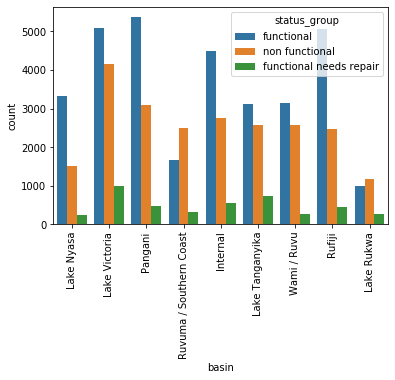

In [31]:
# functional groups by basin

basin_func = sns.countplot(x='basin', hue='status_group', data=pumps)
basin_func.set_xticklabels(basin_func.get_xticklabels(), rotation=90);

In [32]:
# subvillage: dropping as data not identical in train & test, getting dummies not possible

train_features['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Bwozi A        1
Itegetela      1
Ukingi         1
Mulumba B      1
Kihungo A      1
Name: subvillage, Length: 19287, dtype: int64

In [33]:
# region: retain

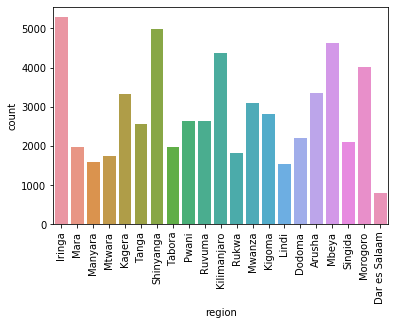

In [34]:
region_chart = sns.countplot(x=train_features['region'], data=train_features)
region_chart.set_xticklabels(region_chart.get_xticklabels(), rotation=90);

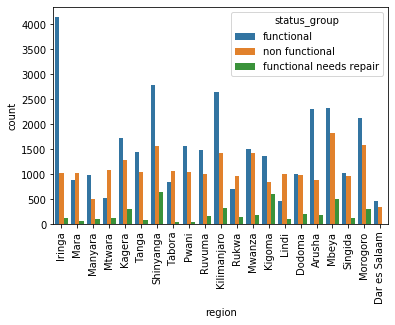

In [35]:
# attn: one region, Iringa has lot more functional pumps comapred to others 

region_func = sns.countplot(x='region', hue='status_group', data=pumps)
region_func.set_xticklabels(region_func.get_xticklabels(), rotation=90);

In [36]:
# region_code: dropping as data not identical in train & test, getting dummies not possible 

train_features['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

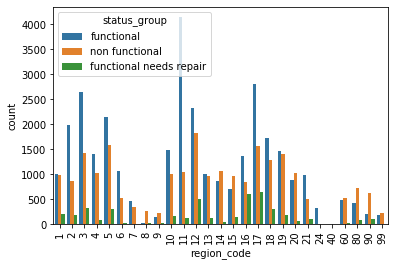

In [37]:
region_code_func = sns.countplot(x='region_code', hue='status_group', data=pumps)
region_code_func.set_xticklabels(region_code_func.get_xticklabels(), rotation=90);

In [38]:
# district_code: retain, some have more functional pumps than others 

train_features['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

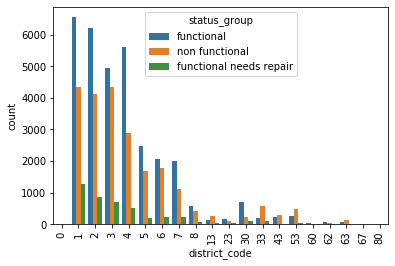

In [39]:
dist_code_func = sns.countplot(x='district_code', hue='status_group', data=pumps)
dist_code_func.set_xticklabels(dist_code_func.get_xticklabels(), rotation=90);

In [40]:
# lga: geographic location (?) 
# not identical in train & test sets, getting dummies not possible

train_features['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [41]:
# ward: geographic location
# not identical in train & test sets, getting dummies not possible

train_features['ward'].value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Mitole             1
Nsemulwa           1
Kihangimahuka      1
Korongoni          1
Ikweha             1
Name: ward, Length: 2092, dtype: int64

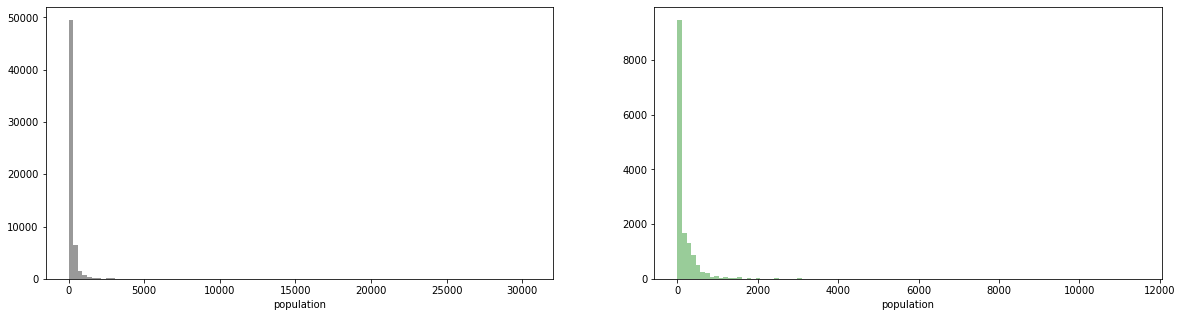

In [42]:
# population: will retain, but vast number of pumps have no one living close by?

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)

ax1 = sns.distplot(train_features['population'], bins=100, kde=False, color='black', ax=ax1)
ax2 = sns.distplot(test_features['population'], bins=100, kde=False, color='green', ax=ax2)

In [43]:
# public_meeting: many missing, not sure anything useful here, drop 

train_features['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [44]:
# recorded_by: again, all by one consulting company, drop

train_features['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [45]:
# scheme_management: quite some missing data, drop

train_features['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [46]:
# scheme name: lots of missing data, drop

train_features['scheme_name'].value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
Kaembe Project               1
Individuals                  1
Mradi wa maji wa Kakola      1
Bujuruga Spring b            1
Kaduma water supply          1
Name: scheme_name, Length: 2696, dtype: int64

In [47]:
# permit: lots of missing values, drop

train_features['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

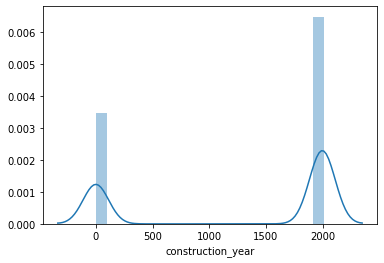

In [48]:
# construction_year: ach the painful one, 35% of data is marked zero 
# no sensible way of figuring out what to impute in its place, esp for so many data points
# just drop 

sns.distplot(train_features['construction_year'])

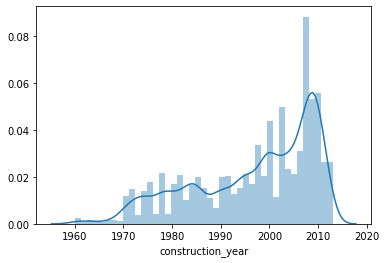

In [49]:
# using boolean to filter
sns.distplot(train_features['construction_year'][train_features['construction_year'] > 0])

In [50]:
# extraction_type: 3 very similar features
# retaining extraction_type_class and dropping other two

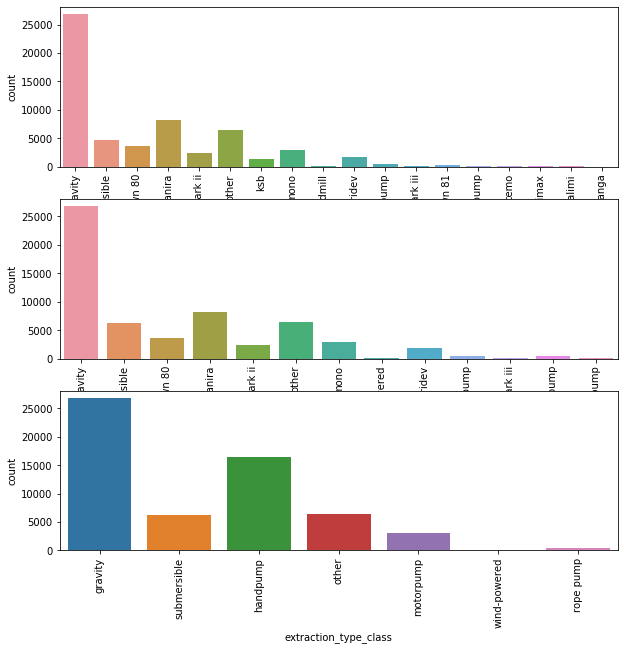

In [51]:
fig, ax = plt.subplots(ncols=1, nrows=3)
fig.set_figheight(10)
fig.set_figwidth(10)

sns.countplot(x = train_features['extraction_type'], data=train_features, ax=ax[0])
sns.countplot(x = train_features['extraction_type_group'], data=train_features, ax=ax[1])
sns.countplot(x = train_features['extraction_type_class'], data=train_features, ax=ax[2])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90);

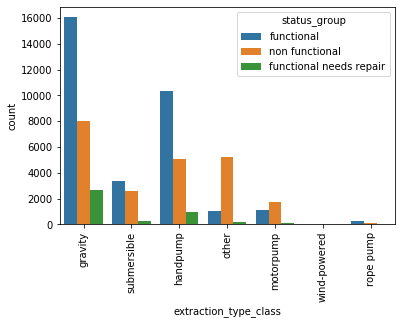

In [52]:
extract_class_func = sns.countplot(x='extraction_type_class', hue='status_group', data=pumps)
extract_class_func.set_xticklabels(extract_class_func.get_xticklabels(), rotation=90);

In [53]:
# management features: most of the data belongs to one class, keeping one management_group

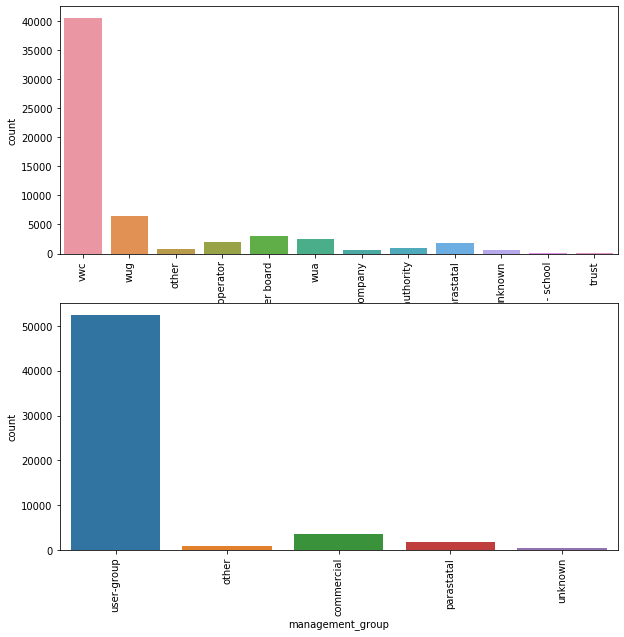

In [54]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(x=train_features['management'], data=train_features, ax=ax[0])
sns.countplot(x=train_features['management_group'], data=train_features, ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);

In [55]:
# payment features: both look very similar, retain one ie payment_type?, some differences in functionality

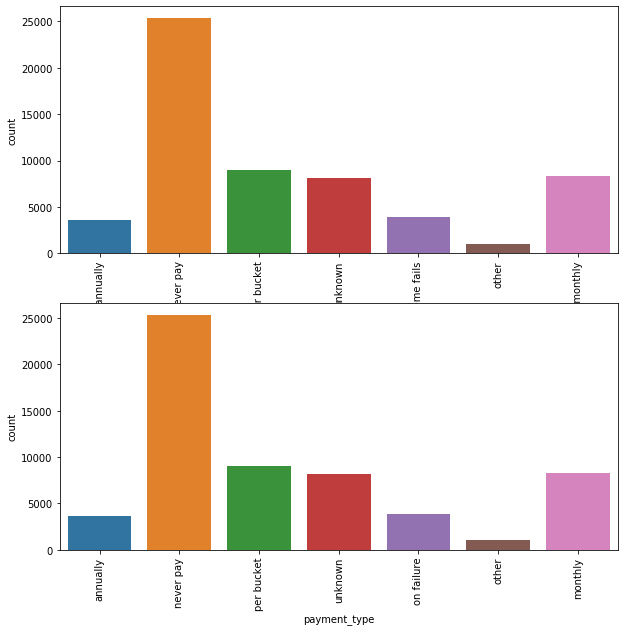

In [56]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(x=train_features['payment'], data=train_features, ax=ax[0])
sns.countplot(x=train_features['payment_type'], data=train_features, ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);

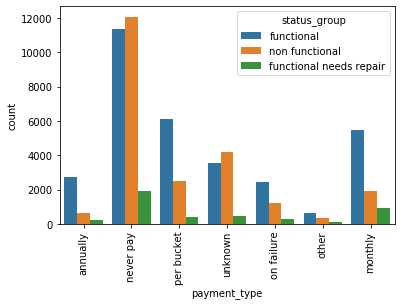

In [57]:
payment_func = sns.countplot(x='payment_type', hue='status_group', data=pumps)
payment_func.set_xticklabels(payment_func.get_xticklabels(), rotation=90);

In [58]:
# quality features: again both very similar, retain one ie quality_group

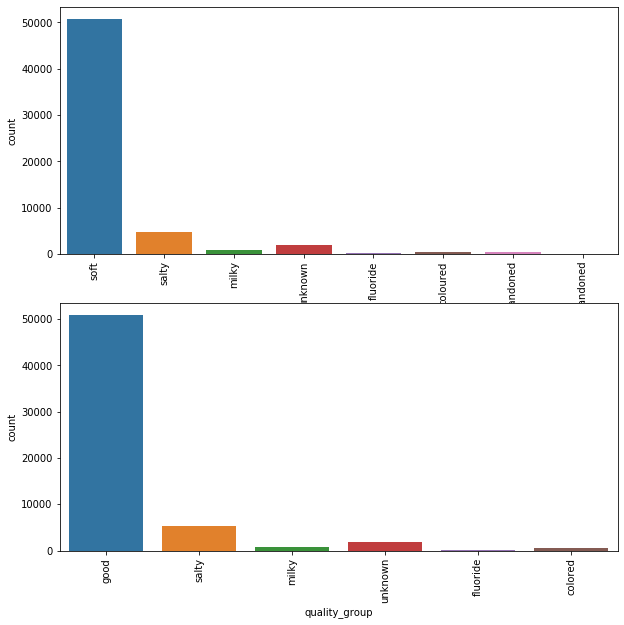

In [59]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(x=train_features['water_quality'], data=train_features, ax=ax[0])
sns.countplot(x=train_features['quality_group'], data=train_features, ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);

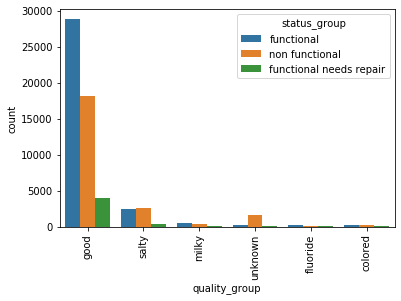

In [60]:
quality_func = sns.countplot(x = 'quality_group', hue = 'status_group', data = pumps)
quality_func.set_xticklabels(quality_func.get_xticklabels(), rotation = 90);

In [61]:
# quantity features: again, keeping one of these, quantity_group

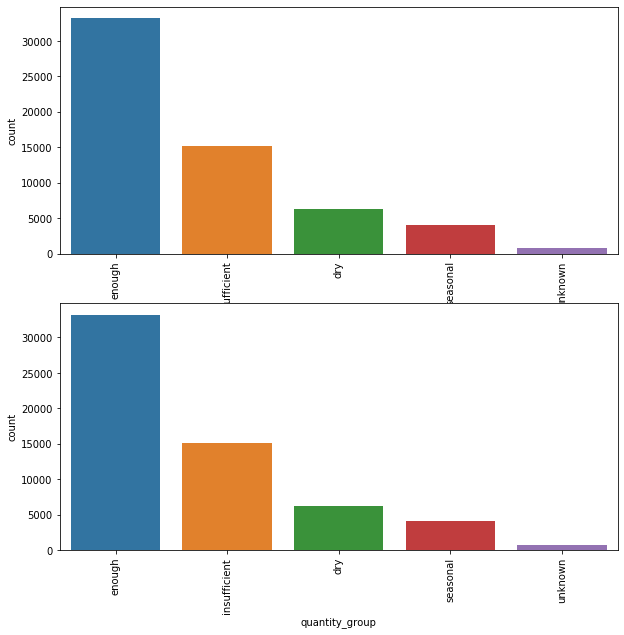

In [62]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(x = train_features['quantity'], data = train_features, ax = ax[0])
sns.countplot(x = train_features['quantity_group'], data = train_features, ax = ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);

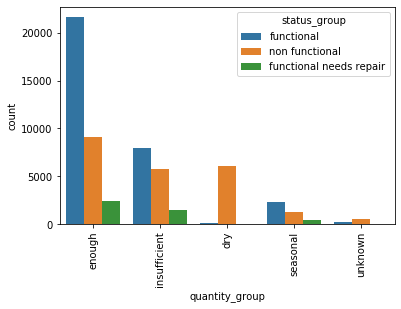

In [63]:
quantity_func = sns.countplot(x = 'quantity_group', hue = 'status_group', data = pumps)
quantity_func.set_xticklabels(quantity_func.get_xticklabels(), rotation = 90);

In [64]:
# source : source_type most interesting

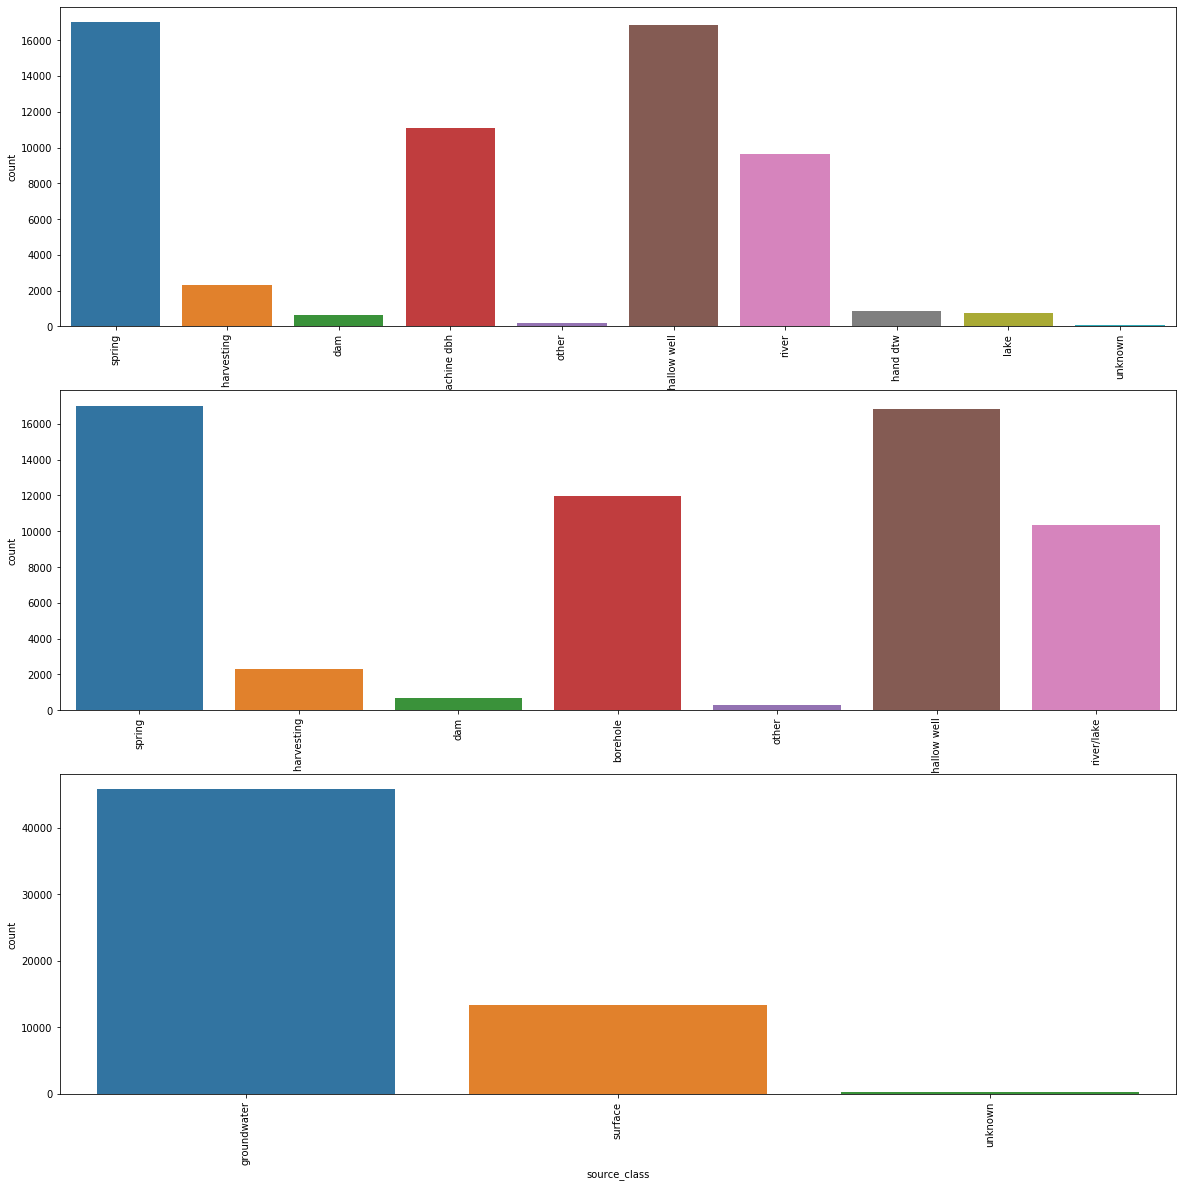

In [65]:
fig, ax = plt.subplots(ncols=1, nrows=3)
fig.set_figheight(20)
fig.set_figwidth(20)
sns.countplot(x = train_features['source'], data = train_features, ax = ax[0])
sns.countplot(x = train_features['source_type'], data = train_features, ax = ax[1])
sns.countplot(x = train_features['source_class'], data = train_features, ax = ax[2])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90);

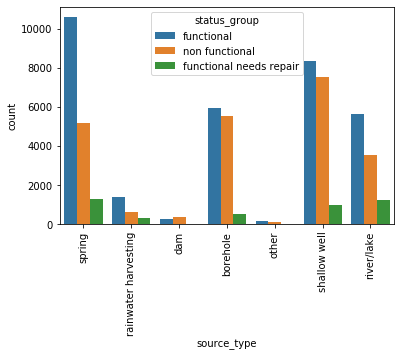

In [66]:
# source type looks more interesting

source_type_func = sns.countplot(x = 'source_type', hue = 'status_group', data = pumps)
source_type_func.set_xticklabels(source_type_func.get_xticklabels(), rotation = 90);

In [67]:
# waterpoint features: keeping waterpoint_type

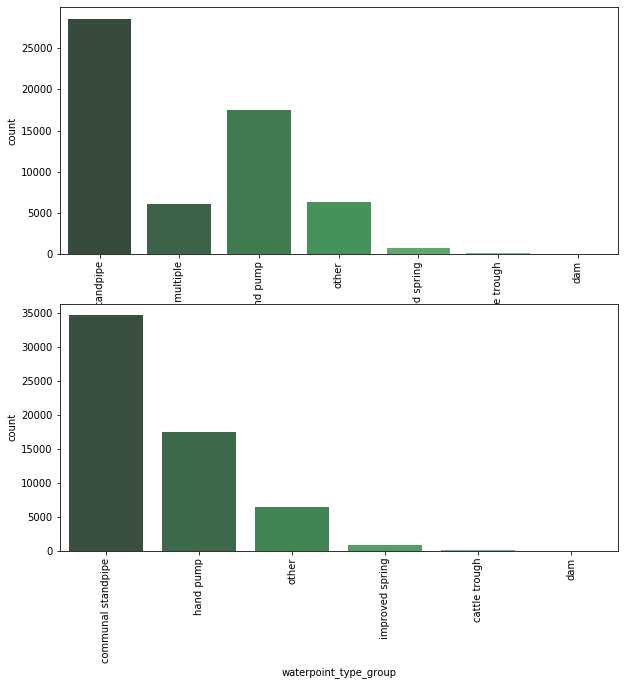

In [68]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(x = train_features['waterpoint_type'], data = train_features, ax = ax[0], palette = 'Greens_d')
sns.countplot(x = train_features['waterpoint_type_group'], data = train_features, ax = ax[1],palette = 'Greens_d')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90);
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);

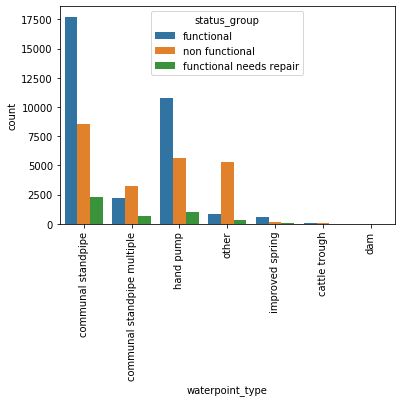

In [69]:
waterpoint_func = sns.countplot(x = 'waterpoint_type', hue = 'status_group', data = pumps)
waterpoint_func.set_xticklabels(waterpoint_func.get_xticklabels(), rotation = 90);

In [70]:
# status group

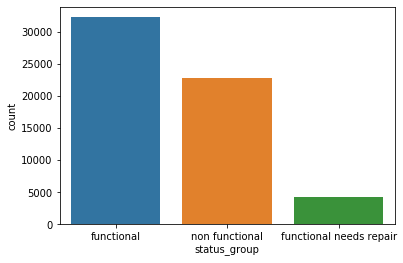

In [71]:
sns.countplot(x = pumps['status_group'], data = train_features)